<a href="https://colab.research.google.com/github/AntonGitOrlov/Data_Science/blob/main/%22%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8_Python_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B_%D1%81_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D1%81%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22_%D0%9E%D1%80%D0%BB%D0%BE%D0%B2%D0%90%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель блокнота

Закрепление навыков
* обработки табличных данных в библиотеке Pandas
* визуализации данных в библиотеке Seaborn
* создание объектов pipeline для предварительной обработки данных в библиотеке scikit-learn

# Задача

**Предсказание успеваемости студентов**
Вам предстоит попробовать себя в оценке данных успеваемости студентов при взаимодействии в электронной среде. Кто сколько баллов наберет в итоге.

**Acknowledgements**
Авторы набора данных: Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).

# Скачиваем Данные

In [ ]:
#↓ "скачай" + ссылка на скачивание
!wget https://github.com/dayekb/mpti_ml/raw/main/competition/data.zip

--2024-11-27 19:53:53--  https://github.com/dayekb/mpti_ml/raw/main/competition/data.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/data.zip [following]
--2024-11-27 19:53:54--  https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47117149 (45M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  44.93M  73.6MB/s    in 0.6s    

2024-11-27 19:53:56 (73.6 MB/s) - ‘data.zip’ saved [47117149/47117149]



Распаковываем архив "на месте"

In [ ]:
#↓ "распакуй" + имя архива
!unzip data.zip

Archive:  data.zip
  inflating: assessments.csv         
  inflating: courses.csv             
  inflating: studentInfo.csv         
  inflating: studentRegistration.csv  
  inflating: studentVle.csv          
  inflating: vle.csv                 
  inflating: studentAssessment.csv   


# Загружаем данные в Pandas

Обновим `scikit-learn` чтобы воспользоваться некими новинками.

Например `TargetEncoder`

In [ ]:
!pip install -U scikit-learn

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas

In [ ]:
plt.style.use('bmh') # выбираем стиль для отрисовки

In [ ]:
# загружаем данные
ass = pd.read_csv('/content/assessments.csv')
courses = pd.read_csv('/content/courses.csv')
results = pd.read_csv('/content/studentAssessment.csv')
info = pd.read_csv('/content/studentInfo.csv')
reg = pd.read_csv('/content/studentRegistration.csv')
vle = pd.read_csv('/content/studentVle.csv')
materials = pd.read_csv('/content/vle.csv')

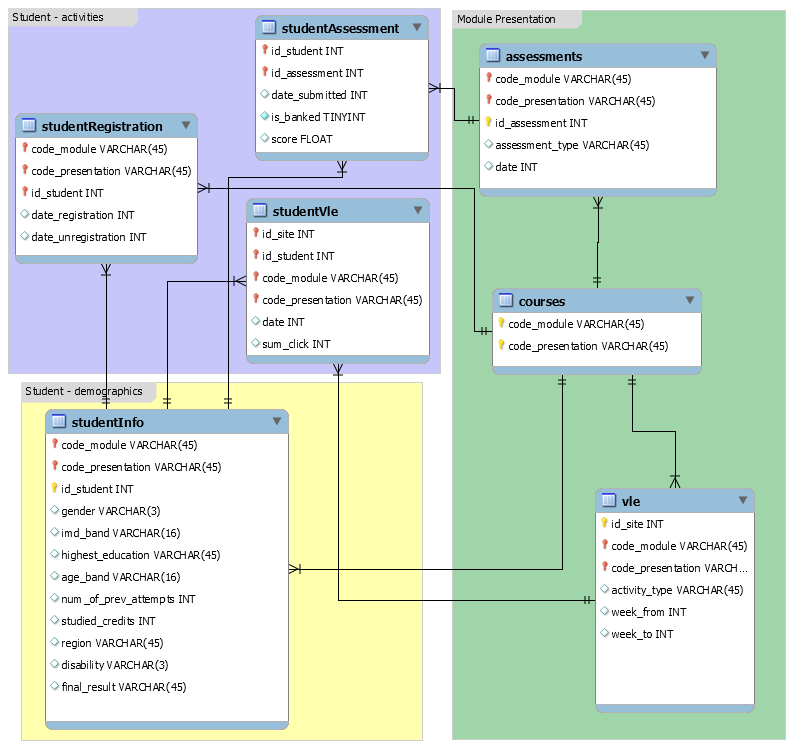

## Assessments info (информация об оценках)

1. **code_module** – идентификационный код модуля, которому принадлежит оценка.
2. **code_presentation** - идентификационный код презентации, к которой относится оценка.
3. **id_assessment** – идентификационный номер оценки.
4. **assessment_type** – вид оценки. Существует три типа оценок: оцениваемая репетитором (TMA), компьютерная оцениваемая оценка (CMA) и итоговый экзамен (Exam).
5. **date** – информация об окончательной дате сдачи оценки, рассчитанная как количество дней с момента начала модуля-презентации. Дата начала презентации имеет номер 0 (ноль).
6. **weight** - вес оценки в %. Обычно Экзамены обрабатываются отдельно и имеют вес 100%; сумма всех остальных оценок равна 100%.

In [ ]:
ass.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [ ]:
ass['id_assessment'] = ass['id_assessment'].astype(object)

In [ ]:
ass.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


## Assessments results (результаты оценки)



1. **id_assessment** – идентификационный номер оценки.
2. **id_student** –уникальный идентификационный номер студента.
3. **date_submitted** – дата представления студентом, измеряемая как количество дней с начала презентации модуля.
4. **is_banked** – флаг состояния, указывающий, что результат оценки был перенесен из предыдущей презентации.

In [ ]:
results.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id_assessment   173912 non-null  int64
 1   id_student      173912 non-null  int64
 2   date_submitted  173912 non-null  int64
 3   is_banked       173912 non-null  int64
dtypes: int64(4)
memory usage: 5.3 MB


In [ ]:
results['id_assessment'] = results['id_assessment'].astype(object)
results['id_student'] = results['id_student'].astype(object)

In [ ]:
results.head()  # Метод .head() - первые 5 строк

,id_assessment,id_student,date_submitted,is_banked
0,1752,11391,18,0
1,1752,28400,22,0
2,1752,31604,17,0
3,1752,32885,26,0
4,1752,38053,19,0


## Courses info (информация о курсах)

1. **code_module** – кодовое имя модуля, которое служит идентификатором.
2. **code_presentation** – кодовое название презентации. Он состоит из года и «B» для презентации, начинающейся в феврале, и «J» для презентации, начинающейся в октябре.
3. **module_presentation_length** - длина модуля-презентации в днях.

In [ ]:
courses.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [ ]:
courses.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


## Student registration (регистрация студентов)

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код презентации.
3. **id_student** – уникальный идентификационный номер студента.
4. **date_registration** – дата регистрации студента на презентацию модуля, это количество дней, измеренное относительно начала презентации модуля (например, отрицательное значение -30 означает, что студент зарегистрировался на презентацию модуля за 30 дней до ее начала).

In [ ]:
reg.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32548 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [ ]:
reg['id_student'] = reg['id_student'].astype(object)

In [ ]:
reg.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0


## VLE resources

1. **id_site** - идентификационный номер материала.
2. **code_module** – идентификационный код модуля.
3. **code_presentation** - идентификационный код презентации.
4. **activity_type** – роль, связанная с материалом модуля.
5. **week_from** – неделя, с которой планируется использовать материал.
6. **week_to** – неделя, до которой планируется использовать материал.

In [ ]:
materials.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [ ]:
materials['id_site'] = materials['id_site'].astype(object)

In [ ]:
materials.head() # Метод .head() - первые 5 строк

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


## VLE Interactions

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код презентации.
3. **id_student** – уникальный идентификационный номер студента.
4. **id_site** - идентификационный номер материала VLE.
5. **date** – дата взаимодействия студента с материалом измеряется как количество дней с начала модуля-презентации.
6. **sum_click** – сколько раз учащийся взаимодействовал с материалом в этот день.

In [ ]:
vle.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [ ]:
vle['id_student'] = vle['id_student'].astype(object)
vle['id_site'] = vle['id_site'].astype(object)

In [ ]:
vle.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


# Задание 1

Воспользоваться [агрегацией](https://colab.research.google.com/drive/1-EccWJJj_3GvhVrv2kEauYSFG40dbwuW#scrollTo=zQMW53tgMkO4) и сгенерировать признаки для триплетов (`code_module` , `code_presentation` , `id_student`)

Базовая идея (на зачет в промежуточной аттестации) - взять простую сумму колонки `sum_click`


Продвинутая (на развитие) - учитывать не только суммарное значение в этой колонке. Так же использовать `date` (например как рано начал работать над заданием) и `id_site` (сколько разных материалов студент изучил) для признаков

Продвинутая* (для самых не ленивых) - объединить таблицы `materials` и `vle` для более детального анализа и генерирования признаков

In [ ]:
# Место для вашего кода
# vle.groupby(['code_module', 'code_presentation', 'id_student'])['sum_click'].sum()
group_result = vle.groupby(['code_module', 'code_presentation', 'id_student']).agg({'sum_click': 'sum',
                                                                     'date': 'min',
                                                                     'id_site': 'count'
                                                                     })

group_result

sum_click  date  id_site
code_module code_presentation id_student                          
AAA         2013J             11391             934    -5      196
                              28400            1435   -10      430
                              30268             281   -10       76
                              31604            2158   -10      663
                              32885            1034   -10      352
...                                             ...   ...      ...
GGG         2014J             2640965            41    -4       19
                              2645731           893    19      237
                              2648187           312   -10      108
                              2679821           275   -14       61
                              2684003           616   -15      181

[29228 rows x 3 columns]

In [ ]:
# merge_materials_vle = pd.merge(materials, vle, how='inner')
# merge_materials_vle

In [ ]:
""" merge_materials_vle.groupby(['code_module', 'code_presentation', 'id_student']).agg({'sum_click': 'sum',
                                                                     'date': 'min',
                                                                     'id_site': 'count',
                                                                     'activity_type': 'count'
                                                                     })
                                                                     """

" merge_materials_vle.groupby(['code_module', 'code_presentation', 'id_student']).agg({'sum_click': 'sum',\n                                                                     'date': 'min',\n                                                                     'id_site': 'count',\n                                                                     'activity_type': 'count'                \n                                                                     })\n                                                                     "

## Student information

1. **code_module** – идентификационный код модуля, на котором зарегистрирован студент.
2. **code_presentation** - идентификационный код презентации, во время которой студент регистрируется на модуле.
3. **id_student** – уникальный идентификационный номер студента.
4. **gender** – пол ученика.
5. **region** – определяет географический регион, в котором студент проживал во время прохождения модуля-презентации.
6. **highest_education** – самый высокий уровень образования студента при поступлении на модульную презентацию.
7. **imd_band** – задает диапазон [Index of Multiple Depravation](https://en.wikipedia.org/wiki/Multiple_deprivation_index#:~:text=Indices%20of%20multiple%20deprivation%20(IMD,a%20single%20score%20of%20deprivation.) места, где студент проживал во время модуля-презентации. (насколько бедный район, короче)
8. **age_band** – диапазон студенческого возраста.
9. **num_of_prev_attempts** – количество раз, когда учащийся пытался пройти этот модуль.
10. **studied_credits** – общее количество кредитов по модулям, которые студент изучает в настоящее время.
11. **disability** – указывает, признан ли студент инвалидом.

In [ ]:
info.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [ ]:
info['id_student'] = info['id_student'].astype(object)

In [ ]:
info.head()  # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


# Как можно объединять данные

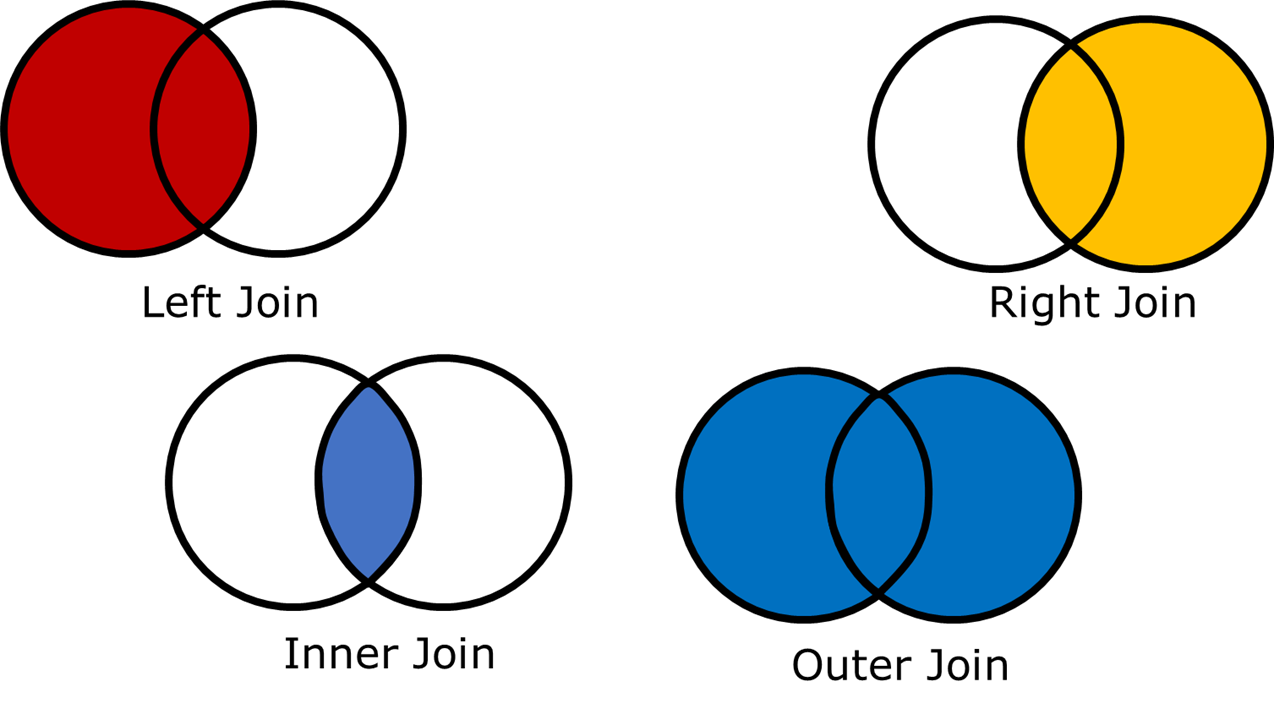

Если мы просто смотрим что можно объединить (в плане признаков), то наверное лучше воспользоваться Inner Join (т.е. только то что есть в обоих фреймах)


### Регистрация + Информация о курсах

In [ ]:
#                                     ↓ по каким колонкам буддем объединять     ↓ как
regCourses = pd.merge(reg, courses, on=['code_module', 'code_presentation'], how='inner')

regCourses

,code_module,code_presentation,id_student,date_registration,module_presentation_length
0,AAA,2013J,11391,-159.0,268
1,AAA,2013J,28400,-53.0,268
2,AAA,2013J,30268,-92.0,268
3,AAA,2013J,31604,-52.0,268
4,AAA,2013J,32885,-176.0,268
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,269
32589,GGG,2014J,2645731,-23.0,269
32590,GGG,2014J,2648187,-129.0,269
32591,GGG,2014J,2679821,-49.0,269


### Регистрация + Информация о курсах + Инфа о студентах

In [ ]:
#                                                   ↓ по каким колонкам буддем объединять              ↓ как
regCoursesInfo = pd.merge(regCourses, info, on=['code_module', 'code_presentation', 'id_student'], how='inner')

regCoursesInfo

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,269,F,Wales,Lower Than A Level,10-20,0-35,0,30,N
32589,GGG,2014J,2645731,-23.0,269,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N
32590,GGG,2014J,2648187,-129.0,269,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y
32591,GGG,2014J,2679821,-49.0,269,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N


# Задание 2


Воспользоваться [объединением](https://colab.research.google.com/drive/1-EccWJJj_3GvhVrv2kEauYSFG40dbwuW#scrollTo=zCjDnrlvBigL) и добавить в таблицу сгенерированные вам признаки

Продвинутый уровень - воспользоваться другими таблицами тоже

In [ ]:
# Место для вашего кода
regCoursesInfoGroup = pd.merge(regCoursesInfo, group_result, on=['code_module', 'code_presentation', 'id_student'], how='inner')

regCoursesInfoGroup

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,date,id_site
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934,-5,196
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1435,-10,430
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,281,-10,76
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2158,-10,663
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1034,-10,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,GGG,2014J,2640965,-4.0,269,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,41,-4,19
29224,GGG,2014J,2645731,-23.0,269,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,893,19,237
29225,GGG,2014J,2648187,-129.0,269,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,312,-10,108
29226,GGG,2014J,2679821,-49.0,269,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,275,-14,61


# Выделение тренировочной выборки

Список студентов, соответсвующих модулей и презентаций (разные студенты могут сдавать разные модули)

In [ ]:
Train_Who = pd.read_csv('https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/Train_Who.csv')
Train_Who

,id,id_student,code_module,code_presentation
0,0,464685,DDD,2014B
1,1,606593,DDD,2013J
2,2,1674799,CCC,2014J
3,3,195246,FFF,2014J
4,4,582080,FFF,2013J
...,...,...,...,...
26069,26069,588477,AAA,2014J
26070,26070,653826,BBB,2014J
26071,26071,126411,BBB,2013B
26072,26072,547448,DDD,2013J


А вот тут Left Join по всему содержимому `Train_Who`

Потому что мы не хотим ничего упустить оттуда

При выполнении задания не забудьте поменять `regCoursesInfo` на название таблицы в которое вы добавили признаки в задании 2

In [ ]:
#                                               ↓ по каким колонкам буддем объединять               ↓ как
Train = pd.merge(Train_Who, regCoursesInfoGroup, on=['id_student', 'code_module', 'code_presentation'], how='left')
# Прячем "наш" id в index фрейма
Train.index = Train.id
# удаляем как столбец, ибо зачем
Train.drop(columns = ['id'], inplace = True)
Train.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,date,id_site
id,,,,,,,,,,,,,,,,
0,464685,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,1694.0,-16.0,595.0
1,606593,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,692.0,-18.0,327.0
2,1674799,CCC,2014J,-21.0,269.0,M,South Region,HE Qualification,70-80%,55<=,0.0,60.0,N,1963.0,-18.0,641.0
3,195246,FFF,2014J,-124.0,269.0,M,West Midlands Region,Lower Than A Level,10-20,0-35,0.0,60.0,N,2138.0,-18.0,719.0
4,582080,FFF,2013J,-114.0,268.0,M,South East Region,Lower Than A Level,10-20,35-55,0.0,60.0,N,188.0,-18.0,82.0


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  26074 non-null  object 
 1   code_module                 26074 non-null  object 
 2   code_presentation           26074 non-null  object 
 3   date_registration           23360 non-null  float64
 4   module_presentation_length  23364 non-null  float64
 5   gender                      23364 non-null  object 
 6   region                      23364 non-null  object 
 7   highest_education           23364 non-null  object 
 8   imd_band                    22521 non-null  object 
 9   age_band                    23364 non-null  object 
 10  num_of_prev_attempts        23364 non-null  float64
 11  studied_credits             23364 non-null  float64
 12  disability                  23364 non-null  object 
 13  sum_click                   23364 no

# Целевая переменная

Для регрессии - это взешенная оценка отдельного **студента** за конкретную **презентацию** по конкретному **модулю**


In [ ]:
Target = pd.read_csv('https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/Train_Target_reg.csv', index_col = 'id')

In [ ]:
Target.head()

,weighted_score
id,
0,64.9125
1,14.8625
2,61.4300
3,39.5000
4,9.2500


Положим целевую переменную в нашу общую таблицу

In [ ]:
Train['weighted_score'] = Target

In [ ]:
Train.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,date,id_site,weighted_score
id,,,,,,,,,,,,,,,,,
0,464685,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,1694.0,-16.0,595.0,64.9125
1,606593,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,692.0,-18.0,327.0,14.8625
2,1674799,CCC,2014J,-21.0,269.0,M,South Region,HE Qualification,70-80%,55<=,0.0,60.0,N,1963.0,-18.0,641.0,61.4300
3,195246,FFF,2014J,-124.0,269.0,M,West Midlands Region,Lower Than A Level,10-20,0-35,0.0,60.0,N,2138.0,-18.0,719.0,39.5000
4,582080,FFF,2013J,-114.0,268.0,M,South East Region,Lower Than A Level,10-20,35-55,0.0,60.0,N,188.0,-18.0,82.0,9.2500


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  26074 non-null  object 
 1   code_module                 26074 non-null  object 
 2   code_presentation           26074 non-null  object 
 3   date_registration           23360 non-null  float64
 4   module_presentation_length  23364 non-null  float64
 5   gender                      23364 non-null  object 
 6   region                      23364 non-null  object 
 7   highest_education           23364 non-null  object 
 8   imd_band                    22521 non-null  object 
 9   age_band                    23364 non-null  object 
 10  num_of_prev_attempts        23364 non-null  float64
 11  studied_credits             23364 non-null  float64
 12  disability                  23364 non-null  object 
 13  sum_click                   23364 no

# Исследовательский анализ данных

пригодилось то, что мы все id-шники закинули в тип данных `object`

теперь можем "автоматически" выполнять предварительную обработку по колонкам

In [ ]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in Train.columns: # смотрим на все колонки в DataFrame
    if (Train[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно

# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['id_student', 'code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability'] 
 Число столблцов =  9
Числовые данные:	  ['date_registration', 'module_presentation_length', 'num_of_prev_attempts', 'studied_credits', 'sum_click', 'date', 'id_site', 'weighted_score'] 
 Число столблцов =  8


# Задание 3

Выполните предварительный анализ [числовых](https://colab.research.google.com/drive/1DKF7VZfDMSQH06YAqGmQqypMboejVkgS#scrollTo=1TSzJ0S-vrTZ) и [категориальных](https://colab.research.google.com/drive/1DKF7VZfDMSQH06YAqGmQqypMboejVkgS#scrollTo=wQ_UIlY63u4d) признаков

1. Для числовых признаков отметьте признаки с наибольшим разбросом, а также признаки с не нормальным распределением.

2. Для категориальных признаков оцените встречаемость отдельных категорий. Предположите, понадобится ли работа с редкими категориями

### 3.1

In [ ]:
Train[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date_registration           23360 non-null  float64
 1   module_presentation_length  23364 non-null  float64
 2   num_of_prev_attempts        23364 non-null  float64
 3   studied_credits             23364 non-null  float64
 4   sum_click                   23364 non-null  float64
 5   date                        23364 non-null  float64
 6   id_site                     23364 non-null  float64
 7   weighted_score              26074 non-null  float64
dtypes: float64(8)
memory usage: 1.8 MB


In [ ]:
# Место для вашего кода
Train[num_columns].describe()

,date_registration,module_presentation_length,num_of_prev_attempts,studied_credits,sum_click,date,id_site,weighted_score
count,23360.000000,23364.000000,23364.000000,23364.000000,23364.00000,23364.000000,23364.000000,26074.000000
mean,-66.764512,256.137562,0.157636,77.945129,1350.11552,-8.207370,363.440079,41.483596
std,47.677152,13.119396,0.473156,39.391992,1721.20149,13.039649,376.491566,33.958099
min,-312.000000,234.000000,0.000000,30.000000,1.00000,-25.000000,1.000000,0.000000
25%,-96.000000,241.000000,0.000000,60.000000,258.75000,-17.000000,93.000000,2.600000
50%,-53.000000,262.000000,0.000000,60.000000,738.00000,-10.000000,241.000000,46.987500
75%,-29.000000,268.000000,0.000000,90.000000,1770.00000,-4.000000,509.000000,73.333333
max,124.000000,269.000000,6.000000,540.000000,24139.00000,238.000000,2953.000000,100.000000


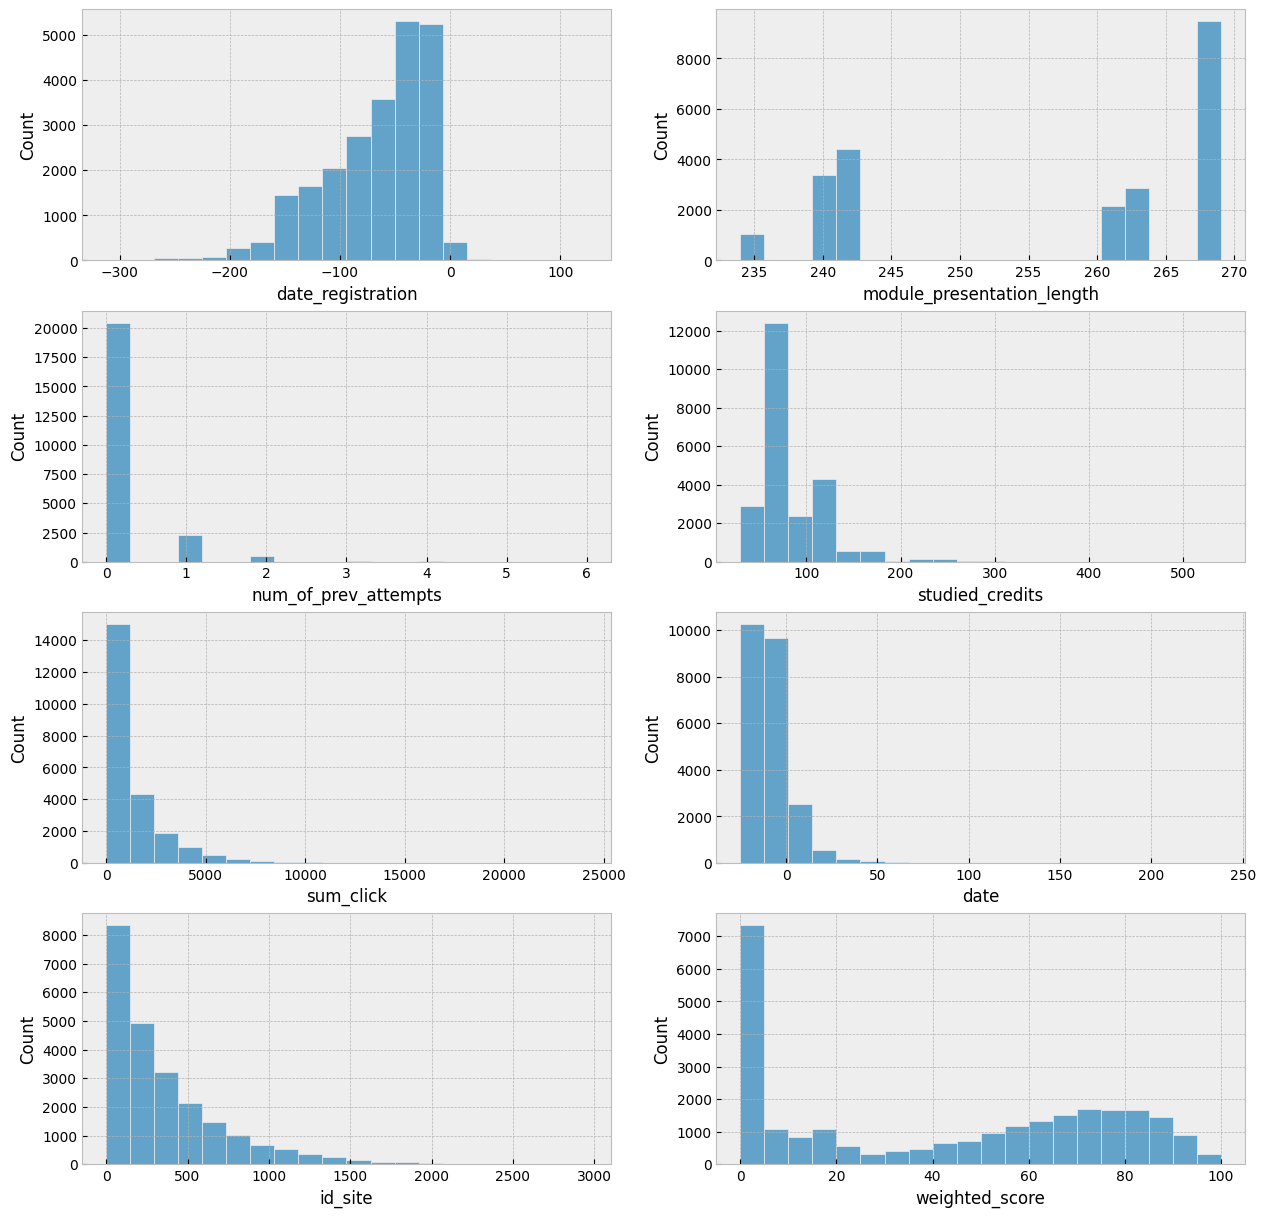

In [ ]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(15,15)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовки
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=Train, # какой датафрейм используем
            x=column_name, # какую переменную отрисовываем
            bins = 20);  # на сколько ячеек разбиваем

### 3.2

In [ ]:
Train[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         26074 non-null  object
 1   code_module        26074 non-null  object
 2   code_presentation  26074 non-null  object
 3   gender             23364 non-null  object
 4   region             23364 non-null  object
 5   highest_education  23364 non-null  object
 6   imd_band           22521 non-null  object
 7   age_band           23364 non-null  object
 8   disability         23364 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [ ]:
Train[cat_columns].describe()

,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability
count,26074,26074,26074,23364,23364,23364,22521,23364,23364
unique,23579,7,4,2,13,5,10,3,2
top,399863,BBB,2014J,M,Scotland,A Level or Equivalent,30-40%,0-35,N
freq,4,6327,9042,13010,2509,10123,2567,16338,21117


In [ ]:
Train[cat_columns].nunique()

,0
id_student,23579
code_module,7
code_presentation,4
gender,2
region,13
highest_education,5
imd_band,10
age_band,3
disability,2


In [ ]:
Train['code_module'].value_counts()

,count
code_module,
BBB,6327
FFF,6210
DDD,5018
CCC,3547
EEE,2347
GGG,2027
AAA,598


In [ ]:
Train['code_presentation'].value_counts()

,count
code_presentation,
2014J,9042
2013J,7074
2014B,6226
2013B,3732


In [ ]:
Train['gender'].value_counts()

,count
gender,
M,13010
F,10354


In [ ]:
Train['region'].value_counts()

,count
region,
Scotland,2509
East Anglian Region,2394
London Region,2276
South Region,2245
North Western Region,2034
West Midlands Region,1766
South West Region,1724
East Midlands Region,1688
Wales,1569


In [ ]:
Train['highest_education'].value_counts()

,count
highest_education,
A Level or Equivalent,10123
Lower Than A Level,9259
HE Qualification,3499
No Formal quals,242
Post Graduate Qualification,241


In [ ]:
Train['imd_band'].value_counts()

,count
imd_band,
30-40%,2567
20-30%,2559
10-20,2443
40-50%,2327
50-60%,2260
0-10%,2254
60-70%,2135
70-80%,2092
80-90%,2002


In [ ]:
Train['age_band'].value_counts()

,count
age_band,
0-35,16338
35-55,6867
55<=,159


In [ ]:
Train['disability'].value_counts()

,count
disability,
N,21117
Y,2247


# Задание 4

Предварительно оцените "полезность" признаков для предсказания целевой переменной

1. Для числовых признаков оцените [корреляцию числовых признаков](https://colab.research.google.com/drive/1DKF7VZfDMSQH06YAqGmQqypMboejVkgS#scrollTo=QWcv1qUsUVyz) с целевой переменной

2. Для категориальных признаков [воспользуйте группировкой](https://colab.research.google.com/drive/1DKF7VZfDMSQH06YAqGmQqypMboejVkgS#scrollTo=v65j22F292KS) для оценки связи с целевой переменной

### 4.1

In [ ]:
# Место для вашего кода
Train[num_columns].corr().style.background_gradient(cmap = 'YlOrRd', # наш цветовой стиль
                                                    vmin = -1, # указываем нижний диапазон
                                                    vmax=1) # указываем верхний  диапазон

,date_registration,module_presentation_length,num_of_prev_attempts,studied_credits,sum_click,date,id_site,weighted_score
date_registration,1.000000,-0.041839,-0.017882,-0.060719,-0.039117,0.137548,-0.056986,0.013045
module_presentation_length,-0.041839,1.000000,-0.063917,-0.024526,0.051056,-0.035565,0.029337,0.054481
num_of_prev_attempts,-0.017882,-0.063917,1.000000,0.178706,-0.071203,0.063185,-0.077961,-0.111979
studied_credits,-0.060719,-0.024526,0.178706,1.000000,-0.013173,-0.087399,-0.012043,-0.137414
sum_click,-0.039117,0.051056,-0.071203,-0.013173,1.000000,-0.247478,0.932852,0.516986
date,0.137548,-0.035565,0.063185,-0.087399,-0.247478,1.000000,-0.303479,-0.116338
id_site,-0.056986,0.029337,-0.077961,-0.012043,0.932852,-0.303479,1.000000,0.588288
weighted_score,0.013045,0.054481,-0.111979,-0.137414,0.516986,-0.116338,0.588288,1.000000


### 4.2

In [ ]:
# Train.groupby(['weighted_score']).count(cat_columns)

# Pipeline для предварительной обработки

In [ ]:
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодирование от scikit-learn

from sklearn.preprocessing import PolynomialFeatures # Полиномиальные признаки от scikit-learn

# чтобы следующая строчка отработала нужно обязательно обновить библиотеку scikit-learn
from sklearn.preprocessing import TargetEncoder # Импортируем Целевое кодирование от scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

**SimpleImputer** - заменяет пропуски на значения
возможные стратегии (`strategy`)


*   `'mean'` - среднее
*   `'median'` - медиана
*   `'most_frequent'` - мода
*   `'constant'` - какое-то конкретное значение (необходимо добавить параметр `fill_value='missing'`)



In [ ]:
imputer =  SimpleImputer(strategy='median')

**PolynomialFeatures** - генерирует полиномиальные признаки, а также взаимодействие между признаками


*   `degree` - степень полиномов
*   `interaction_only` - опция оставить только взаимодействие между признаками




In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

**TargetEncoder** - делает числовое кодирование для категориальных признаков. Кодирование происходит в зависимости от типа решаемой задачи `target_type`


*   `'continuous'` - задача регрессии
*   `'binary'` - задача бинарной классификации
*   `'multiclass'` - задача мультиклассовой классификации

**Важно**
Для работы этого метода необходимо использовать как признаки, так и целевую переменную (пример ниже)

In [ ]:
te = TargetEncoder(target_type="continuous")
X = Train[['gender']]
y = Train.weighted_score

te.fit_transform(X,y);

Кодируемые категории

In [ ]:
te.categories_

[array(['F', 'M'], dtype=object)]

Каким числом категории кодируются

In [ ]:
te.encodings_

[array([41.3588773 , 41.58614083])]

объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате
* строка- название (даем имя Объекту)
* и сам объект (с заданными аргументами, если необходимо)

Сначала создадим отдельно Pipeline для числовых данных (вставление пропусков + нормализация)

Объект `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате

* строка- название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


# Задание 5

1. Подготовьте pipeline для предварительной обработки признаков

* Программа минимум (на зачет): создать простой pipeline из двух компонет - одна для числовых признаков, вторая для категориальных. Каждая компонента состоит из двух элементов - заменятель пропущенных значений и объект предварительной обработки (масштабирования для числовых признаков и кодировки для категориальных признаков)


* Продвинутая программа: дополнительное деление на компонеты, например для числовых признаков можно разделить на стандартизацию и на степенное преобразование, для категориальных можно делать one-hot кодирование для признаков с небольшим количеством уникальных значений (меньше 10), а для признаков с большим количеством - целевое кодирование


2. Проверить работоспособность полученного pipeline

In [ ]:
# Место для вашего кода